# Health and GDP Data - Keynan Peretz: 204649933 :

In this project, i investigate the correlation between the economic output of a country and
the health of its citizens.

The analysis relies on the visualization techniques provided mainly by matplotlib and seaborn which are imported
using Python 3.



GDP per capita source:https://stats.oecd.org/

GDP Growth by precents:https://stats.oecd.org/

Life expectancy source:https://stats.oecd.org/

Mortality source:https://stats.oecd.org/

Morbidity source:https://stats.oecd.org/

Cancer source:https://stats.oecd.org/



# 1. Import Python Modules

- matplotlib
- pandas
- seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

# 2. Data Preprocessing

In [2]:
GdpM = pd.read_csv("GdpMillions.csv")
GdpGrowth = pd.read_csv("GdpGrowth.csv")
LifeExp = pd.read_csv("LifeExp.csv")
Mortality = pd.read_csv("Mortality.csv")
Morbidity = pd.read_csv("Morbidity.csv")
AllCancer = pd.read_csv("CancerAll.csv")

In [3]:
GdpM = GdpM.rename(columns={'Time': 'Year'}) 

In [4]:
GdpGrowth= GdpGrowth.rename(columns={'Time': 'Year'}) 

In [5]:
GdpM.drop(GdpM[GdpM.Year <= 1999].index, inplace=True)
GdpM.drop(GdpM[GdpM.Subject != 'Gross Domestic Product (GDP); millions'].index, inplace=True)
GdpM.drop(GdpM[GdpM.MEASURE != 'CPC'].index, inplace=True)


GdpMn = GdpM.rename(columns={'Value': 'GDPValue'}) 
GdpMn.drop(['LOCATION','SUBJECT','Subject','Measure','Unit','PowerCode','MEASURE','TIME','Unit Code','PowerCode Code','Reference Period Code','Reference Period','Flag Codes','Flags'],axis=1,inplace=True)
GdpMn

,Country,Year,GDPValue
226,Australia,2000,5.375518e+05
227,Australia,2001,5.681213e+05
228,Australia,2002,5.993012e+05
229,Australia,2003,6.359028e+05
230,Australia,2004,6.748585e+05
...,...,...,...
44599,Euro area (19 countries),2014,1.351580e+07
44600,Euro area (19 countries),2015,1.392835e+07
44601,Euro area (19 countries),2016,1.480707e+07
44602,Euro area (19 countries),2017,1.558175e+07


In [6]:
GdpGrowth.drop(GdpGrowth[GdpGrowth.Year <= 1999].index, inplace=True)
GdpGrowth.drop(GdpGrowth[GdpGrowth.MEASURE != 'GRW'].index, inplace=True)
GdpGrowth.drop(GdpGrowth[GdpGrowth.SUBJECT != 'T_GDPPOP_V'].index, inplace=True)
GdpGrowthn = GdpGrowth.rename(columns={'Value': 'GrowthinPrecents'})
GdpGrowthn.drop(['LOCATION','SUBJECT','Subject','Measure','Unit','PowerCode','MEASURE','TIME','Unit Code','PowerCode Code','Reference Period Code','Reference Period','Flag Codes','Flags'],axis=1,inplace=True)
GdpGrowthn

,Country,Year,GrowthinPrecents
2391,Israel,2000,5.962749
2392,Israel,2001,-2.214154
2393,Israel,2002,-2.208013
2394,Israel,2003,-0.748190
2395,Israel,2004,3.014962
...,...,...,...
43905,Costa Rica,2014,2.206831
43906,Costa Rica,2015,2.365837
43907,Costa Rica,2016,3.002144
43908,Costa Rica,2017,2.208908


In [7]:
LifeExp.drop(LifeExp[LifeExp.Measure != 'Years'].index, inplace=True)
LifeExp.drop(LifeExp[LifeExp.Variable != 'Total population at birth'].index, inplace=True)
LifeExp.drop(LifeExp[LifeExp.Value <=  67].index, inplace=True)
LifeExp = LifeExp.rename(columns={'Value': 'LifeExp'}) 
LifeExp.drop(['VAR','Variable','UNIT','COU','Measure','YEA','Flag Codes','Flags'],axis=1,inplace=True) 
LifeExp.head()

,Country,Year,LifeExp
180,Australia,2000,79.3
181,Australia,2001,79.7
182,Australia,2002,80.0
183,Australia,2003,80.3
184,Australia,2004,80.6


In [8]:
Mortality.drop(Mortality[Mortality.Year <= 1999].index, inplace=True)
Mortality.drop(Mortality[Mortality.Variable != 'All causes of death'].index, inplace=True)
Mortality.drop(Mortality[Mortality.Measure != 'Deaths per 100 000 population (standardised rates)'].index, inplace=True)
Mortality.drop(columns=['VAR','UNIT','COU','YEA','Flag Codes','Flags','Measure','Variable'],axis=1,inplace=True)
Mortality = Mortality.rename(columns={'Value': 'Mortality'}) 
Mortality.head()

,Country,Year,Mortality
0,Australia,2000,815.7
1,Australia,2001,787.9
2,Australia,2002,791.2
3,Australia,2003,762.2
4,Australia,2004,753.4


In [9]:
Morbidity.drop(Morbidity[Morbidity.Year <= 1999].index, inplace=True)
Morbidity.drop(columns=['VAR','UNIT','COU','YEA','Flag Codes','Flags'],axis=1,inplace=True)
Morbidity = Morbidity.rename(columns={'Value': 'Morbidity'}) 
MorbidityBreastCancer = Morbidity.loc[(Morbidity.Variable == "Malignant neoplasms of female breast")]
MorbidityBreastCancer.drop(MorbidityBreastCancer[MorbidityBreastCancer.Measure != "Incidence per 100 000 females"].index, inplace=True)
MorbidityBreastCancer.drop(columns=['Variable','Measure'],axis=1,inplace=True)
MorbidityLungsCancer = Morbidity.loc[(Morbidity.Variable == "Malignant neoplasms of lung")]
MorbidityLungsCancer.drop(MorbidityLungsCancer[MorbidityLungsCancer.Measure != "Incidence per 100 000 population"].index, inplace=True)
MorbidityLungsCancer.drop(columns=['Variable','Measure'],axis=1,inplace=True)
MorbidityLungsCancer = MorbidityLungsCancer.rename(columns={'Morbidity': 'MorbidityLungsCancer'}) 
MorbidityBreastCancer = MorbidityBreastCancer.rename(columns={'Morbidity': 'MorbidityBreastCancer'}) 


MorbidityLungsCancer

C:\Users\keyni\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Year,MorbidityLungsCancer
3867,Australia,2002,28.2
3868,Australia,2008,25.6
3869,Australia,2012,27.0
3930,Austria,2000,27.0
3931,Austria,2002,28.5
...,...,...,...
6138,South Africa,2012,18.5
28831,Latvia,2012,27.8
28866,Costa Rica,2012,7.3
28887,Colombia,2012,11.0


In [10]:
MorbidityBreastCancer

,Country,Year,MorbidityBreastCancer
7609,Australia,2002,83.2
7610,Australia,2008,84.8
7611,Australia,2012,86.0
7631,Austria,2000,67.2
7632,Austria,2002,70.5
...,...,...,...
8273,South Africa,2012,41.5
28840,Colombia,2012,35.7
28856,Lithuania,2012,48.7
28885,Latvia,2012,52.1


In [11]:
AllCancer.drop(AllCancer[AllCancer.Measure != 'Incidence per 100 000 population'].index, inplace=True)

AllCancer.drop(columns=['VAR','UNIT','Measure','COU','YEA','Flag Codes','Flags'],axis=1,inplace=True) 
AllCancer = AllCancer.rename(columns={'Value': 'AllCancer'}) 
#AllCancer = pd.crosstab(AllCancer.Variable, columns=['count'])
AllCancer



,Variable,Country,Year,AllCancer
0,Malignant neoplasms,Australia,2002,312.0
1,Malignant neoplasms,Australia,2008,314.1
2,Malignant neoplasms,Australia,2012,323.0
3,Malignant neoplasms of colon,Australia,2002,41.7
4,Malignant neoplasms of colon,Australia,2008,38.7
...,...,...,...,...
2933,Malignant neoplasms of colon,Costa Rica,2012,16.4
2942,Malignant neoplasms of lung,Colombia,2012,11.0
2959,Malignant neoplasms of colon,Colombia,2012,12.9
2962,Malignant neoplasms,Latvia,2012,246.8


# 3. Data Merge

In [12]:
Total1 = pd.merge(GdpMn, GdpGrowthn, on='Year' and 'Country', how='outer')
Total1.drop(Total1[Total1.Year_x != Total1.Year_y].index, inplace=True)
Total1.drop(['Year_x'],axis=1,inplace=True)
Total1 = Total1.rename(columns={'Year_y': 'Year'}) 


Total2 = pd.merge(LifeExp, Total1, on='Year' and 'Country', how='outer')
Total2.drop(Total2[Total2.Year_x != Total2.Year_y].index, inplace=True)
Total2.drop(['Year_x'],axis=1,inplace=True)
Total2 = Total2.rename(columns={'Year_y': 'Year'}) 

Total3 = pd.merge(Mortality, Total2, on='Year' and 'Country', how='outer')
Total3.drop(Total3[Total3.Year_x != Total3.Year_y].index, inplace=True)
Total3.drop(['Year_x'],axis=1,inplace=True)
Total3 = Total3.rename(columns={'Year_y': 'Year'}) 

Total4 = pd.merge(MorbidityBreastCancer, Total3, on='Year' and 'Country', how='inner')
Total4.drop(Total4[Total4.Year_x != Total4.Year_y].index, inplace=True)
Total4.drop(['Year_x'],axis=1,inplace=True)
Total4 = Total4.rename(columns={'Year_y': 'Year'}) 

Total5 = pd.merge(MorbidityLungsCancer, Total4, on='Year' and 'Country', how='inner')
Total5.drop(Total5[Total5.Year_x != Total5.Year_y].index, inplace=True)
Total5.drop(['Year_x'],axis=1,inplace=True)
Total5 = Total5.rename(columns={'Year_y': 'Year'})



TotalGdp_LifeExp_GdpGrowthn_Mortality=Total3
TotalAll=Total5

In [13]:
TotalGdp_LifeExp_GdpGrowthn_Mortality

,Country,Mortality,LifeExp,GDPValue,Year,GrowthinPrecents
0,Australia,815.7,79.3,537551.7552,2000.0,0.771099
19,Australia,787.9,79.7,568121.2860,2001.0,2.674617
38,Australia,791.2,80.0,599301.2200,2002.0,1.821140
57,Australia,762.2,80.3,635902.7982,2003.0,2.865661
76,Australia,753.4,80.6,674858.4809,2004.0,2.106541
...,...,...,...,...,...,...
11029,Lithuania,1189.1,74.1,78911.0803,2013.0,4.611764
11048,Lithuania,1139.6,74.7,82564.2828,2014.0,4.401798
11067,Lithuania,1170.1,74.5,83730.5611,2015.0,2.997558
11086,Lithuania,1142.1,74.8,88699.7561,2016.0,3.867427


In [14]:

TotalAll

,Country,MorbidityLungsCancer,MorbidityBreastCancer,Mortality,LifeExp,GDPValue,Year,GrowthinPrecents
0,Australia,28.2,83.2,791.2,80.0,5.993012e+05,2002.0,1.821140
4,Australia,25.6,84.8,723.4,81.5,8.519831e+05,2008.0,-0.085599
8,Australia,27.0,86.0,663.5,82.1,9.975273e+05,2012.0,0.839521
9,Austria,27.0,67.2,953.9,78.2,2.354360e+05,2000.0,3.127424
14,Austria,28.5,70.5,928.0,78.8,2.519848e+05,2002.0,1.150624
...,...,...,...,...,...,...,...,...
385,Russia,24.0,45.6,1448.7,70.2,3.685812e+06,2012.0,3.481593
386,Slovenia,31.5,65.5,894.1,79.1,5.983959e+04,2008.0,3.350761
389,Slovenia,33.9,66.5,832.5,80.2,5.974567e+04,2012.0,-2.825401
390,Latvia,27.8,52.1,1227.5,73.9,4.331312e+04,2012.0,5.423328


# 4. Model Planning  - GDP Value & GDP Growth Vs Mortality & Life Expentancy  

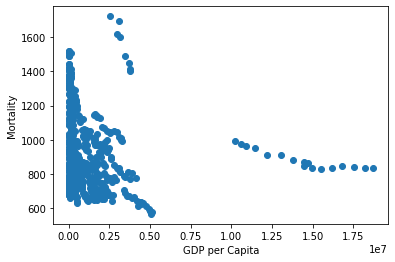

In [15]:
X = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['GDPValue']]
y = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['Mortality']]
plt.scatter(X, y)
plt.xlabel('GDP per Capita')
plt.ylabel('Mortality')
plt.show()

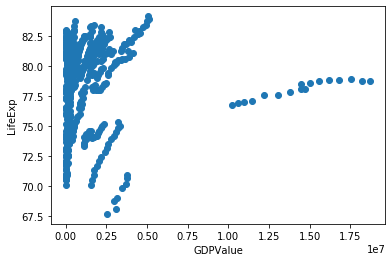

In [16]:
X = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['GDPValue']]
y = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['LifeExp']]
plt.scatter(X, y)
plt.xlabel('GDPValue')
plt.ylabel('LifeExp')
plt.show()

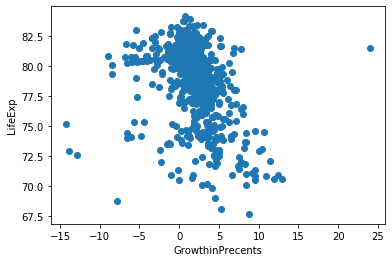

In [17]:
X = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['GrowthinPrecents']]
y = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['LifeExp']]
plt.scatter(X, y)
plt.xlabel('GrowthinPrecents')
plt.ylabel('LifeExp')
plt.show()

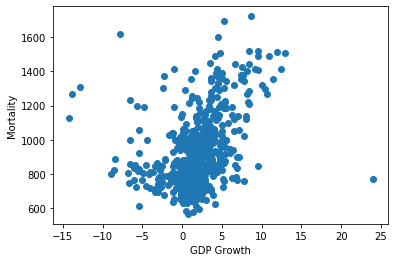

In [18]:
X = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['GrowthinPrecents']]
y = np.c_[TotalGdp_LifeExp_GdpGrowthn_Mortality['Mortality']]
plt.scatter(X, y)
plt.xlabel('GDP Growth')
plt.ylabel('Mortality')
plt.show()

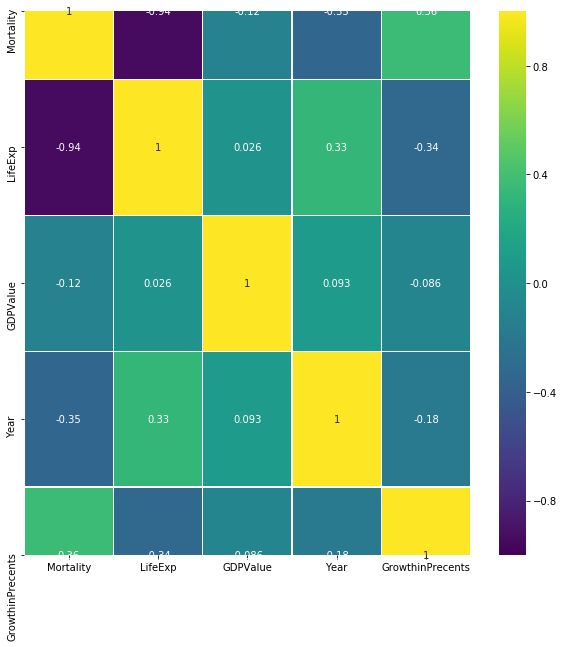

In [19]:
TotCOL=TotalGdp_LifeExp_GdpGrowthn_Mortality.corr()
plt.figure(figsize=(10,10))
sns.heatmap(TotCOL, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

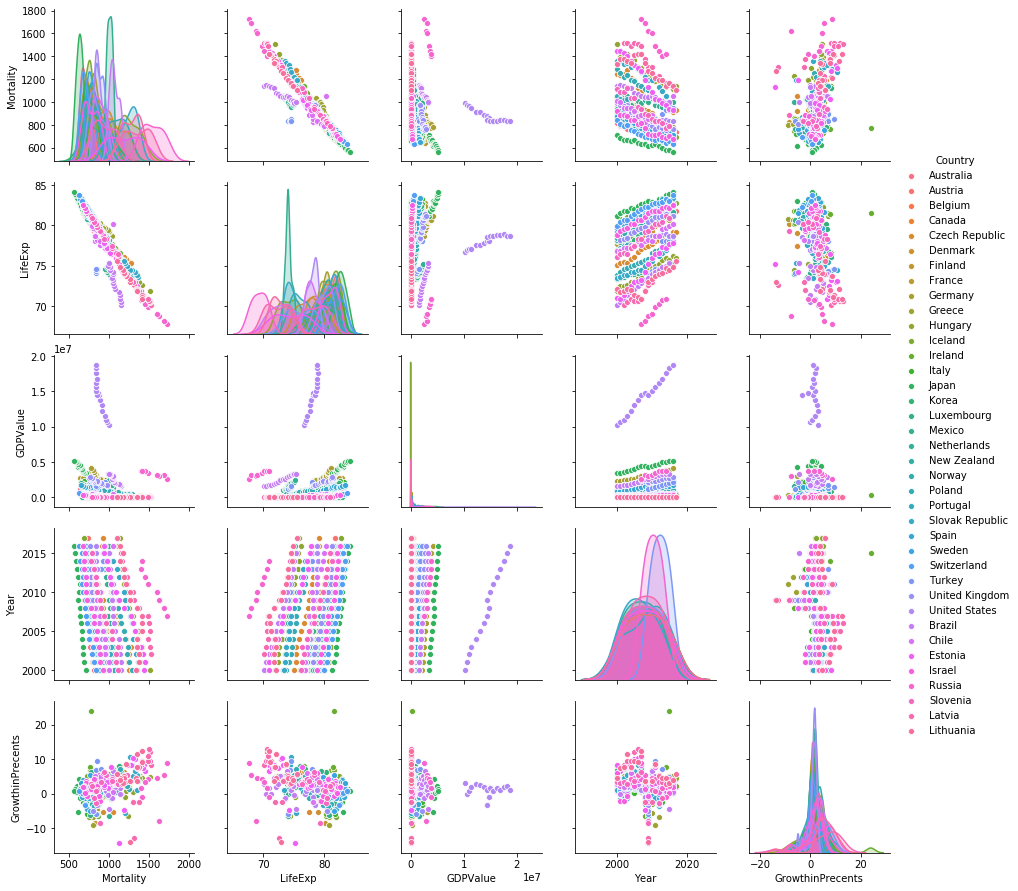

In [20]:
sns.pairplot(TotalGdp_LifeExp_GdpGrowthn_Mortality, hue='Country', palette='husl')

# 5. Run Model and Evaluate on Australia

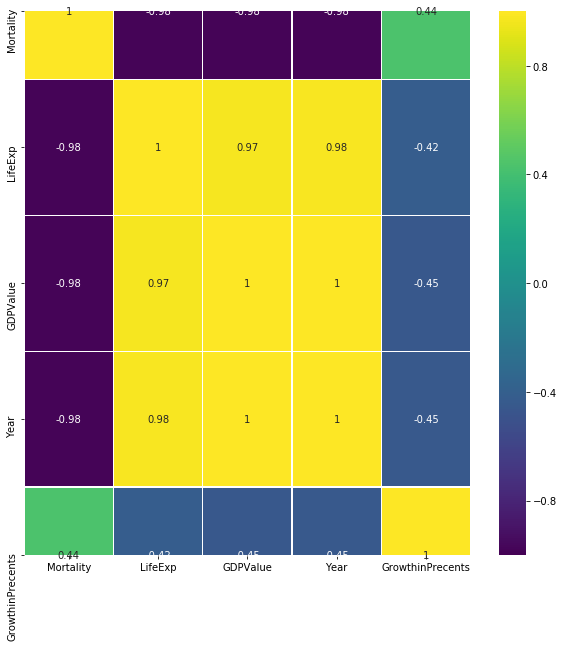

In [21]:
Australia = TotalGdp_LifeExp_GdpGrowthn_Mortality.loc[(TotalGdp_LifeExp_GdpGrowthn_Mortality.Country == "Australia")]
plt.figure(figsize=(10,10))
sns.heatmap(Australia.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

Text(0.5, 1.0, 'GDPValue Vs LifeExp')

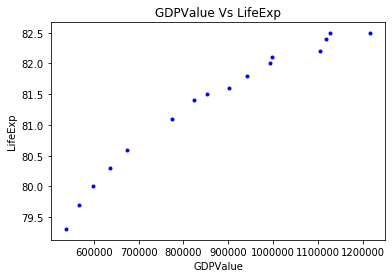

In [22]:
x=Australia.GDPValue
y=Australia.LifeExp
plt.scatter(x,y ,c='b',marker='.')
plt.xlabel("GDPValue")
plt.ylabel("LifeExp")
plt.title('GDPValue Vs LifeExp')

Text(0.5, 1.0, 'GDPValue Vs Life Exp')

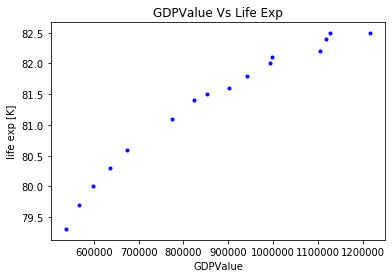

In [23]:
x=Australia.GDPValue
y=Australia.LifeExp
plt.scatter(x,y ,c='b',marker='.')
plt.xlabel("GDPValue")
plt.ylabel("life exp [K]")
plt.title('GDPValue Vs Life Exp')

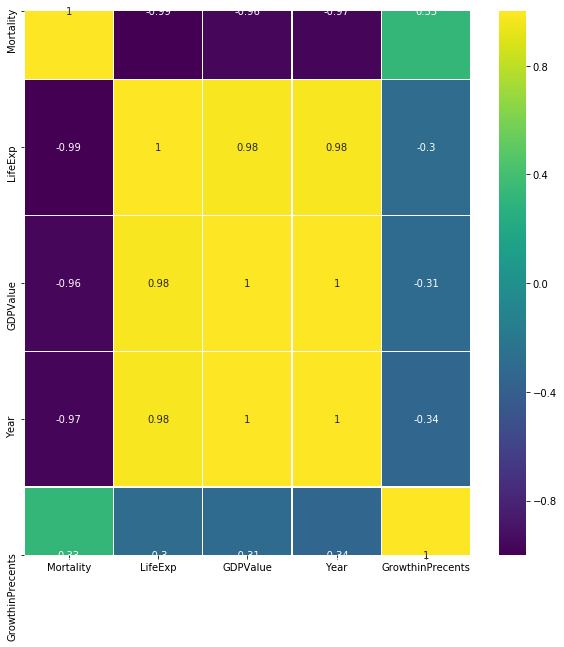

In [24]:
Belgium = TotalGdp_LifeExp_GdpGrowthn_Mortality.loc[(TotalGdp_LifeExp_GdpGrowthn_Mortality.Country == "Belgium")]
plt.figure(figsize=(10,10))
sns.heatmap(Belgium.corr(), vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [37]:
import statsmodels.formula.api as smf
linreg=smf.ols('LifeExp~GDPValue+GrowthinPrecents',data=Australia).fit()
linreg.summary()


C:\Users\keyni\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LifeExp   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           4.09e-09
Time:                        11:05:28   Log-Likelihood:                0.97124
No. Observations:                  16   AIC:                             4.058
Df Residuals:                      13   BIC:                             6.375
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           77.2079      0.359    215.299      0.000      76.433      77.983
GDPValue          4.682e-06   3.34e-07     14.011      0.000    3.96e-06     5.4e-06
GrowthinPrecents     0.0333      0.078      0.425      0.678      -0.136       0.202
==============================================================================
Omnibus:                        1.761   Durbin-Watson:                   0.592
Prob(Omnibus):                  0.415   Jarque-Bera (JB):                1.411
Skew:                          -0.648   Prob(JB):                        0.494
Kurtosis:                       2.337   Cond. No.                     5.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import statsmodels.formula.api as smf
linreg=smf.ols('Mortality~GDPValue+GrowthinPrecents',data=Australia).fit()
linreg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Mortality   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     135.0
Date:                Mon, 27 Jan 2020   Prob (F-statistic):           2.01e-09
Time:                        11:06:08   Log-Likelihood:                -62.060
No. Observations:                  16   AIC:                             130.1
Df Residuals:                      13   BIC:                             132.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          932.3134     18.428     50.591      0.000     892.501     972.126
GDPValue            -0.0003   1.72e-05    -14.702      0.000      -0.000      -0.000
GrowthinPrecents    -0.5590      4.024     -0.139      0.892      -9.252       8.134
==============================================================================
Omnibus:                        1.675   Durbin-Watson:                   1.350
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                0.902
Skew:                           0.075   Prob(JB):                        0.637
Kurtosis:                       1.847   Cond. No.                     5.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:

feature_cols = ['GrowthinPrecents','GDPValue']
X = Australia[feature_cols]
y = Australia.LifeExp
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print ("RMSE=" ,np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ("MAE=" , metrics.mean_absolute_error(y_test, y_pred))
print ("R-squared:" ,lm.score(X, y))

RMSE= 0.1833360520711238
MAE= 0.14248164212983383
R-squared: 0.947448127106973


In [40]:

feature_cols = ['GrowthinPrecents','GDPValue']
X = Australia[feature_cols]
y = Australia.Mortality
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print ("RMSE=" ,np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ("MAE=" , metrics.mean_absolute_error(y_test, y_pred))
print ("R-squared:" ,lm.score(X, y))

RMSE= 8.661276485078524
MAE= 6.2521827224987305
R-squared: 0.9538137353461065


In [27]:
x=Australia[['Mortality','LifeExp']]
y=Australia[['GDPValue']]

In [28]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
scalex = scx.fit_transform(x)
scaley = scy.fit_transform(y)

In [29]:
##70 30 split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
# random_state=100 is used in order to make the calculations reproducible in repeated runs
lm = LinearRegression()
lm.fit(X_train, y_train)
y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

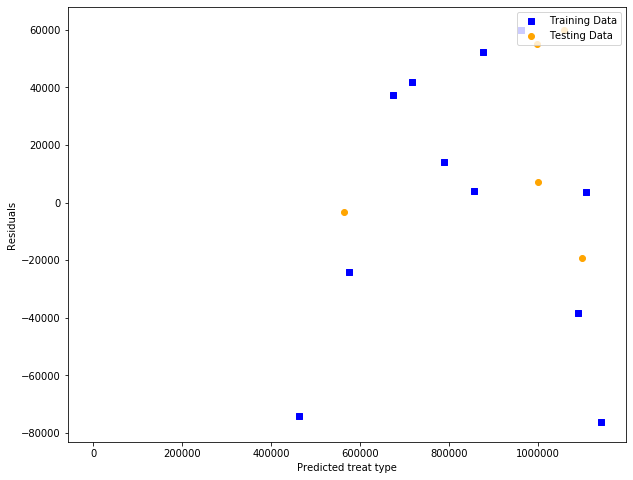

In [30]:
train_residual = y_train_pred - y_train
test_residual = y_test_pred - y_test
plt.figure(figsize=(10,8))
plt.scatter(y_train_pred, train_residual, c='blue', marker='s', label="Training Data")
plt.scatter(y_test_pred, test_residual, c='orange', marker='o', label="Testing Data")
plt.xlabel("Predicted treat type")
plt.ylabel("Residuals")
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=50, xmax=120, lw=2, color='k')
plt.show()